<a href="https://colab.research.google.com/github/renanalvesdeveloper/Data-Science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://www.cadernodeviagem.com.br/wp-content/uploads/2019/08/onde-ficar-em-santiago-do-chile.png">

*by [Renan Alves](https://www.linkedin.com/in/renan-alves-9b1b71b7/)*

---

# Análise dos Dados do Airbnb - *Santiago*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Santiago, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Santiago (good for visualisations).*


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2019-03-15/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14576,Dp Valen Castillo 1600,14972,Bruno,NaN,Santiago,-33.46413,-70.64869,Entire home/apt,67025,5,0,NaN,NaN,1,363
1,34552,Big nd nice room + private bathroom,149223,Gladys,NaN,Santiago,-33.46354,-70.64851,Private room,32172,3,0,NaN,NaN,1,365
2,47936,My Flat in English,218471,Nelsk,NaN,Santiago,-33.44791,-70.63547,Private room,36864,1,0,NaN,NaN,1,365
3,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,36864,3,0,NaN,NaN,3,178
4,50466,Great apartment at a great location,231631,Marco,NaN,Santiago,-33.43630,-70.65390,Entire home/apt,56971,1,0,NaN,NaN,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa (`listings.csv.gz`).

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas(linhas):\t {}".format(df.shape[0]))
print("Variáveis(colunas):\t {}".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas(linhas):	 15790
Variáveis(colunas):	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **Q1.1 Realizando a conversão de valores**

> Com objetivo de facilitar análises futuras estaremos convertendo os valores da coluna `price`  para **Reais** uma vez que esses valores de Preço são baseados na moeda local **Peso chileno**.

> <img alt="Colaboratory logo" width="50%" src="https://i.ibb.co/CQW6v5R/valor-convert.jpg">






In [0]:
#convertendo peso chileno para valor em reaus com base na cotação de hoje (04/06/2020)
df.price = df.price*0.0066

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  43.761875
last_review                        43.761875
name                                0.088664
host_name                           0.031666
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

> Para identificar a distribuição das variáveis, irei plotar um **histograma**.

> *Um **histograma** é um gráfico de frequência que tem como objetivo ilustrar como uma determinada amostra ou população de dados está distribuída.*



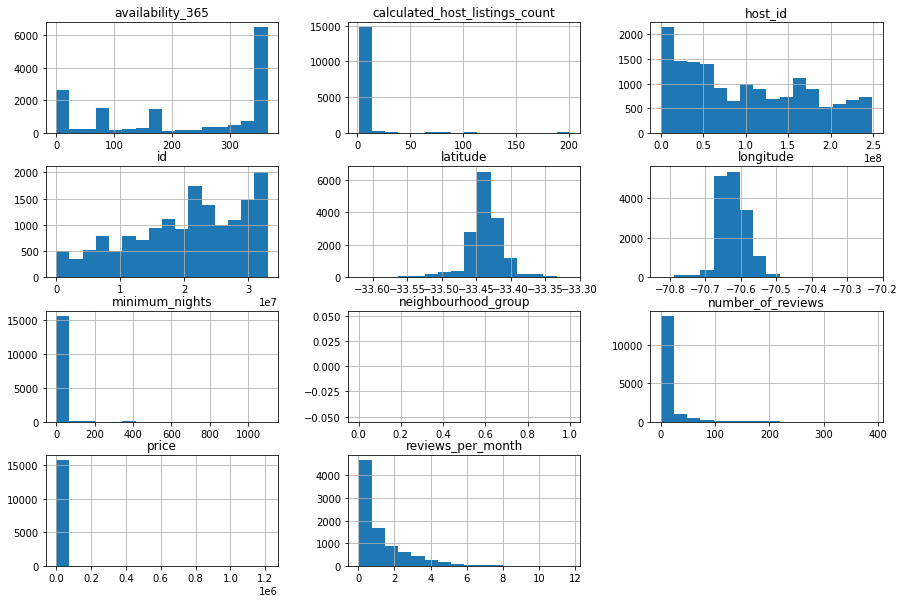

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=16,figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [0]:
#média geral da coluna price em R$
df.price.mean()

470.40225518679193

### **Q4. Qual a correlação existente entre as variáveis**

In [39]:
# criar uma matriz de correlação
cor = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(cor)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.004226,-0.009294,-0.009764,0.001903,0.011972
minimum_nights,0.004226,1.000000,-0.030030,-0.047408,-0.023717,0.004447
number_of_reviews,-0.009294,-0.030030,1.000000,0.617882,-0.012858,0.019165
reviews_per_month,-0.009764,-0.047408,0.617882,1.000000,-0.002890,-0.000609
calculated_host_listings_count,0.001903,-0.023717,-0.012858,-0.002890,1.000000,0.173370
availability_365,0.011972,0.004447,0.019165,-0.000609,0.173370,1.000000


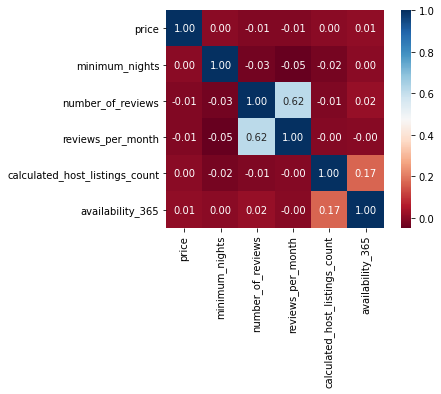

In [41]:
# plotar um heatmap a partir das correlações
sns.heatmap(cor, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.


In [42]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    8829
Private room       6588
Shared room         373
Name: room_type, dtype: int64

* `Entire home/apt ` - Casa ou Apto inteiro
* `Private room `    - Quarto privado
* `Shared room  `    - Quato Compartilhado

***Podemos Observar que a maioria dos hóspedes procuram alugar imóveis por completo***

In [44]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df.room_type.value_counts()/df.shape[0])*100

Entire home/apt    55.915136
Private room       41.722609
Shared room         2.362255
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Santiago ?**

 Neste caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [45]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Conchalí         2537.233462
Independencia    1627.948227
Maipú            1103.943622
Las Condes       1090.770415
Lo Barnechea      636.816280
La Florida        441.516067
Renca             429.829950
La Pintana        420.245100
Providencia       403.363288
Vitacura          401.169938
Name: price, dtype: float64

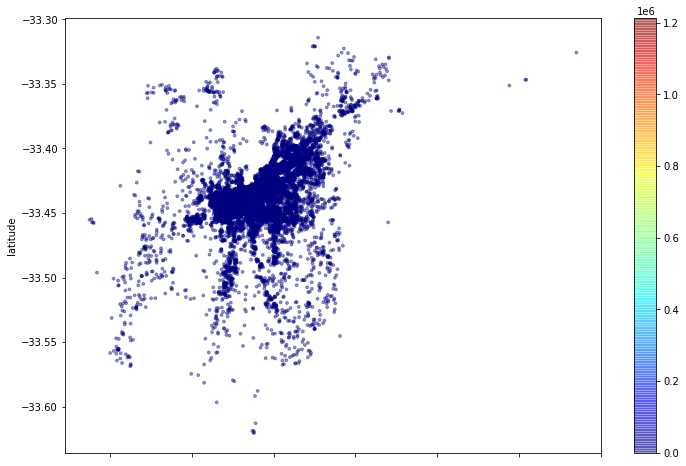

In [46]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [47]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

5.084863837872071

## **Conclusões**

Foi realizada uma análise superficial na base de dados do Airbnb, porém é possível perceber que a maior disponibilidade de imóveis  para locação se encontram na região central de Santiago, uma vez que nessa região temos o Centro Histórico, nessa localidade também encontramos uma grande quantidade casas de câmbio com as melhores cotações da cidade.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.